# Libs

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# Selección de variables y justificación


Para este análisis bivariado se seleccionan las variables **Temp** (diferencia de la temperatura global respecto al valor de referencia histórico) y **CO2** (concentración de dióxido de carbono en ppmv).

La elección se justifica porque el **CO2 es el principal gas de efecto invernadero**, y múltiples estudios han mostrado que su incremento está directamente relacionado con el aumento de la temperatura global. Analizar la relación entre ambas variables resulta fundamental para comprender el impacto de las emisiones humanas en el cambio climático.

In [7]:
df = pd.read_csv('../data/climate_change.csv')
df

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
0,1983,5,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863,0.109
1,1983,6,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794,0.118
2,1983,7,1.741,344.15,1633.22,303.795,192.818,353.725,1366.2850,0.0731,0.137
3,1983,8,1.130,342.25,1631.35,303.839,193.602,355.633,1366.4202,0.0673,0.176
4,1983,9,0.428,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619,0.149
...,...,...,...,...,...,...,...,...,...,...,...
303,2008,8,-0.266,384.15,1779.88,321.405,244.200,535.072,1365.6570,0.0036,0.407
304,2008,9,-0.643,383.09,1795.08,321.529,244.083,535.048,1365.6647,0.0043,0.378
305,2008,10,-0.780,382.99,1814.18,321.796,244.080,534.927,1365.6759,0.0046,0.440
306,2008,11,-0.621,384.13,1812.37,322.013,244.225,534.906,1365.7065,0.0048,0.394


#  Análisis y visualizaciones en Python

Correlación de Pearson entre Temp y CO2: 0.7485046457380218


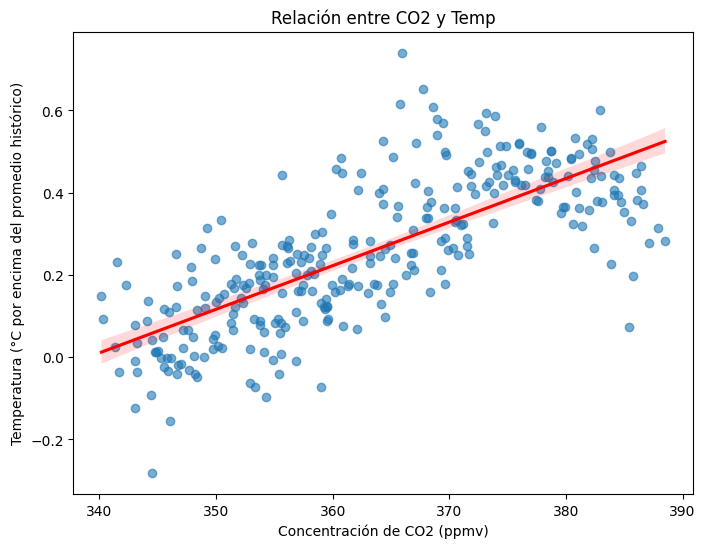

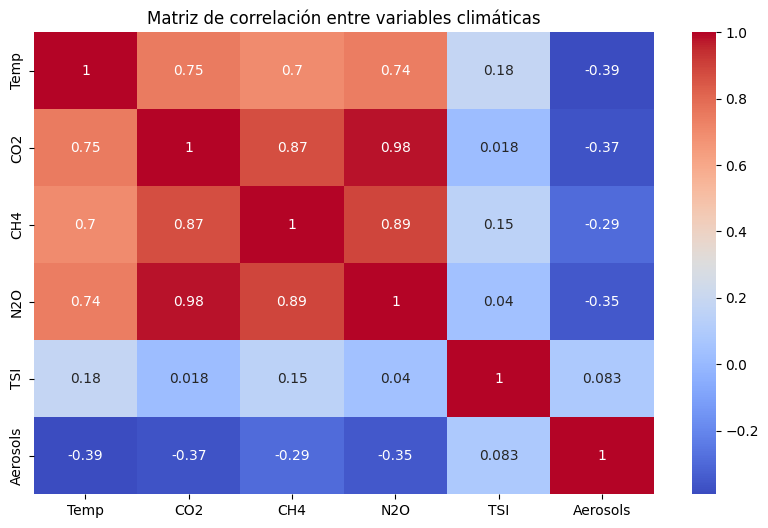

In [8]:
# Correlación entre Temp y CO2
corr = df["Temp"].corr(df["CO2"])
print("Correlación de Pearson entre Temp y CO2:", corr)

# Gráfico de dispersión con línea de tendencia
plt.figure(figsize=(8,6))
sns.regplot(x="CO2", y="Temp", data=df, scatter_kws={"alpha":0.6}, line_kws={"color":"red"})
plt.title("Relación entre CO2 y Temp")
plt.xlabel("Concentración de CO2 (ppmv)")
plt.ylabel("Temperatura (°C por encima del promedio histórico)")
plt.show()

# Heatmap de correlación entre múltiples variables numéricas
plt.figure(figsize=(10,6))
sns.heatmap(df[["Temp","CO2","CH4","N2O","TSI","Aerosols"]].corr(), annot=True, cmap="coolwarm")
plt.title("Matriz de correlación entre variables climáticas")
plt.show()

El análisis del heatmap de correlación y del diagrama de dispersión evidencia que **CO₂ mantiene una relación positiva fuerte con la variable Temp**. No obstante, la asociación no parece ser estrictamente lineal, especialmente en los valores más altos de CO₂, donde la pendiente del gráfico se atenúa. Para confirmar esta tendencia y evaluar una posible relación monótona no lineal, resulta pertinente calcular también el **coeficiente de correlación de Spearman**.


In [10]:
# Correlación de Pearson
pearson_corr, p_value_pearson = stats.pearsonr(df["CO2"], df["Temp"])
print("Coeficiente de Pearson:", pearson_corr)
print("Valor p (Pearson):", p_value_pearson)

# Correlación de Spearman (no lineal)
spearman_corr, p_value_spearman = stats.spearmanr(df["CO2"], df["Temp"])
print("Coeficiente de Spearman:", spearman_corr)
print("Valor p (Spearman):", p_value_spearman)

Coeficiente de Pearson: 0.7485046457380211
Valor p (Pearson): 1.5578804156203076e-56
Coeficiente de Spearman: 0.7767509604626791
Valor p (Spearman): 2.1144272950582172e-63


El **coeficiente de Pearson** obtenido fue **0.749** con un valor *p* de **1.55e-56**. Esto indica una **correlación lineal positiva fuerte** entre la concentración de CO₂ y la variable *Temp*, y la significancia estadística es muy alta (p < 0.05), por lo que se descarta que la relación sea producto del azar.

El **coeficiente de Spearman** fue **0.777** con un valor *p* de **2.11e-63**, lo cual también refleja una **correlación positiva fuerte**, pero en este caso de tipo **monótona**. Esto confirma que, aunque la relación no sea perfectamente lineal en todos los rangos de CO₂, la temperatura tiende a aumentar consistentemente conforme lo hacen los niveles de CO₂.

En conjunto, ambos resultados respaldan la conclusión de que **el incremento de CO₂ está estrechamente asociado con el aumento de la temperatura global** en el período analizado (1983–2008).


C:\Users\Juan Jose\AppData\Local\Temp\ipykernel_18008\1627820669.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="CO2_categoria", y="Temp", data=df, palette="Set2")


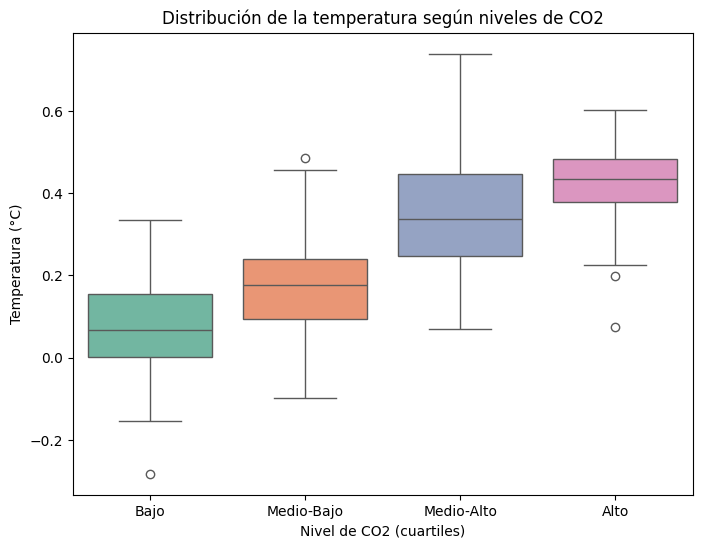

In [12]:
# Crear categorías de CO2 por cuartiles
df["CO2_categoria"] = pd.qcut(df["CO2"], q=4, labels=["Bajo","Medio-Bajo","Medio-Alto","Alto"])

plt.figure(figsize=(8,6))
sns.boxplot(x="CO2_categoria", y="Temp", data=df, palette="Set2")
plt.title("Distribución de la temperatura según niveles de CO2")
plt.xlabel("Nivel de CO2 (cuartiles)")
plt.ylabel("Temperatura (°C)")
plt.show()

El **boxplot de temperatura según niveles de CO₂** muestra un desplazamiento progresivo de la mediana hacia valores más altos conforme aumentan las concentraciones de CO₂. En el grupo **“Bajo”**, la mediana se ubica cerca de 0 °C, mientras que en el grupo **“Alto”** supera los 0.4 °C. Además, la dispersión de valores es mayor en las categorías intermedias, lo que indica una mayor variabilidad de la temperatura en estos rangos. La presencia de algunos outliers refleja episodios puntuales de temperaturas extremas, pero no modifica la tendencia general.

C:\Users\Juan Jose\AppData\Local\Temp\ipykernel_18008\2535798005.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="CO2_categoria", y="Temp", data=df, estimator=np.mean, ci=None, palette="muted")
C:\Users\Juan Jose\AppData\Local\Temp\ipykernel_18008\2535798005.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="CO2_categoria", y="Temp", data=df, estimator=np.mean, ci=None, palette="muted")


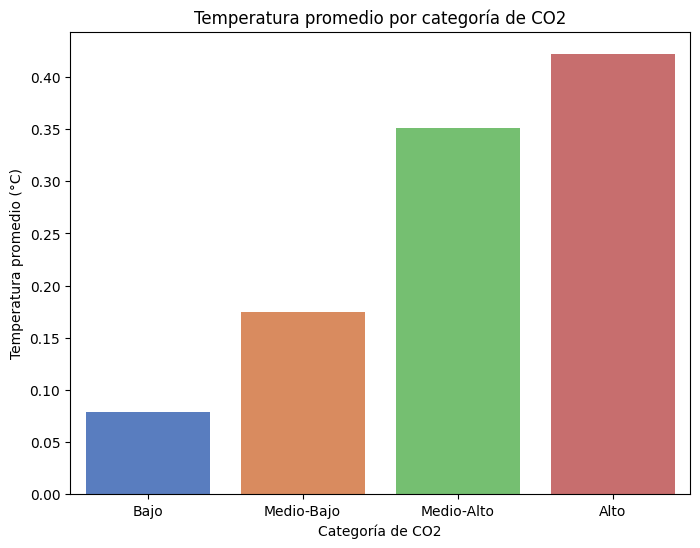

In [13]:
plt.figure(figsize=(8,6))
sns.barplot(x="CO2_categoria", y="Temp", data=df, estimator=np.mean, ci=None, palette="muted")
plt.title("Temperatura promedio por categoría de CO2")
plt.xlabel("Categoría de CO2")
plt.ylabel("Temperatura promedio (°C)")
plt.show()

El **gráfico de barras de temperatura promedio por categoría de CO₂** confirma esta relación, evidenciando un incremento sistemático de la temperatura promedio: desde aproximadamente **0.08 °C en el grupo “Bajo”** hasta más de **0.42 °C en el grupo “Alto”**. La progresión es prácticamente lineal, lo que refuerza la idea de un vínculo estrecho entre el aumento del CO₂ y el calentamiento global.

En conjunto, ambos gráficos coinciden en señalar que **mayores concentraciones de CO₂ se asocian con incrementos sostenidos en la temperatura global**. Estos resultados respaldan la hipótesis de que los gases de efecto invernadero desempeñan un papel determinante en el cambio climático.


# Conclusiones

El análisis bivariado entre la concentración de **CO₂** y la variable **Temp** permitió identificar una **correlación positiva fuerte y estadísticamente significativa**. Tanto el coeficiente de Pearson (0.75) como el de Spearman (0.78) confirmaron que, a medida que aumentan las concentraciones de CO₂ en la atmósfera, la temperatura global tiende a incrementarse de manera consistente.  

Las visualizaciones refuerzan este hallazgo: el diagrama de dispersión mostró una tendencia creciente, mientras que los boxplots y el gráfico de barras evidenciaron un aumento sistemático de la temperatura al pasar de niveles bajos a altos de CO₂. El heatmap, por su parte, reveló que otros gases de efecto invernadero como CH₄ y N₂O también mantienen relaciones positivas con la temperatura, lo que sugiere un patrón multivariable en la dinámica del calentamiento global.  

En el contexto del conjunto de datos, esta relación respalda la hipótesis científica de que las emisiones de gases de efecto invernadero son un factor determinante en el cambio climático. Como próximos pasos, sería pertinente realizar un **análisis multivariado** que incluya otras variables (CH₄, N₂O, aerosoles, TSI) y evaluar modelos predictivos que permitan cuantificar la contribución relativa de cada uno de estos factores al incremento de la temperatura global aplicando métodos de regularización como Ridge para reducir el impacto de las variables que no sean significativas para los modelos o que tengan colinealidad con otras..
